In [1]:
#importing libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline 
matplotlib.rcParams['figure.figsize']=(12,8) #adje

In [2]:
# read the data (indexing and parsing date)
f_birth = pd.read_csv('C:\pythoncode\EDA Python\Births2015.csv',index_col=[0], parse_dates=[0])

In [3]:
type(f_birth)

pandas.core.frame.DataFrame

In [4]:
f_birth.head()

,births
date,
2015-01-01,8068
2015-01-02,10850
2015-01-03,8328
2015-01-04,7065
2015-01-05,11892


In [5]:
f_birth.tail()

,births
date,
2015-12-27,7518
2015-12-28,13100
2015-12-29,13458
2015-12-30,13100
2015-12-31,11608


In [6]:
f_birth.describe()

,births
count,365.000000
mean,10899.991781
std,2076.683881
min,6515.000000
25%,8431.000000
50%,11883.000000
75%,12339.000000
max,13949.000000


In [7]:
# read the data  and convering into series 
f_birth = pd.read_csv('C:\pythoncode\EDA Python\Births2015.csv',index_col=[0], parse_dates=[0], squeeze=True)

In [8]:
type(f_birth)

pandas.core.series.Series

In [9]:
f_birth.head()

date
2015-01-01     8068
2015-01-02    10850
2015-01-03     8328
2015-01-04     7065
2015-01-05    11892
Name: births, dtype: int64

In [10]:
#extracting values from a series using .values method
series_value = f_birth.values
series_value

array([ 8068, 10850,  8328,  7065, 11892, 12425, 12141, 12094, 11868,
        8014,  7172, 11479, 11924, 12013, 12339, 11861,  8280,  7195,
       10602, 12242, 12086, 11949, 11910,  8235,  7186, 11728, 11882,
       11602, 11967, 11571,  7987,  7139, 11480, 12079, 11924, 11821,
       11656,  8285,  7265, 11937, 12291, 11911, 12285, 11321,  8390,
        7508, 11038, 11952, 12061, 11968, 11864,  8343,  7254, 11260,
       11941, 11828, 11672, 11596,  7989,  7273, 11609, 12402, 11927,
       11681, 11612,  7980,  6929, 11678, 12282, 11850, 12042, 10940,
        8217,  7202, 11537, 12312, 11807, 11721, 12040,  8080,  7171,
       11674, 12333, 11872, 12065, 11629,  8071,  7125, 11500, 12362,
       11596, 12296, 11234,  7981,  6821, 11455, 12334, 11976, 11874,
       11724,  8092,  7141, 11503, 12309, 11794, 11947, 11718,  8028,
        7180, 11513, 12173, 11917, 11877, 11749,  8101,  7178, 11494,
       12221, 11775, 11831, 12178,  8075,  7195, 11724, 12618, 11924,
       11649, 11810,

In [11]:
type(series_value)

numpy.ndarray

In [12]:
f_birth.size

365

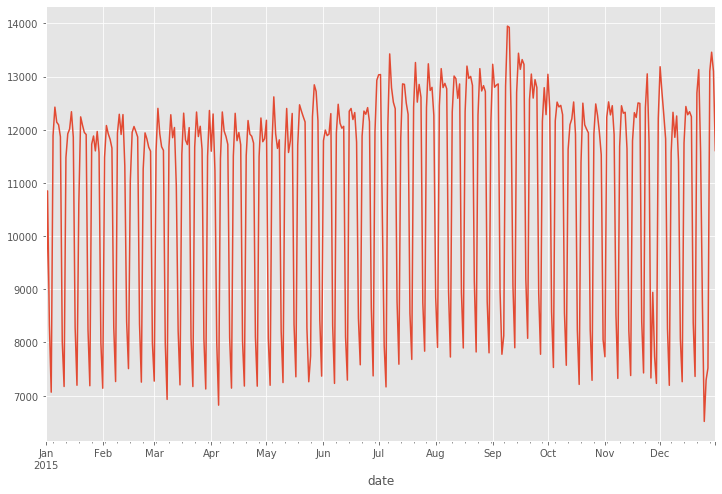

In [13]:
f_birth.plot()

In [14]:
#stationary series (without trends, constant mean and constant std)
#moving avarage used for smoothning of series
f_birth_mean = f_birth.rolling(window = 20).mean()

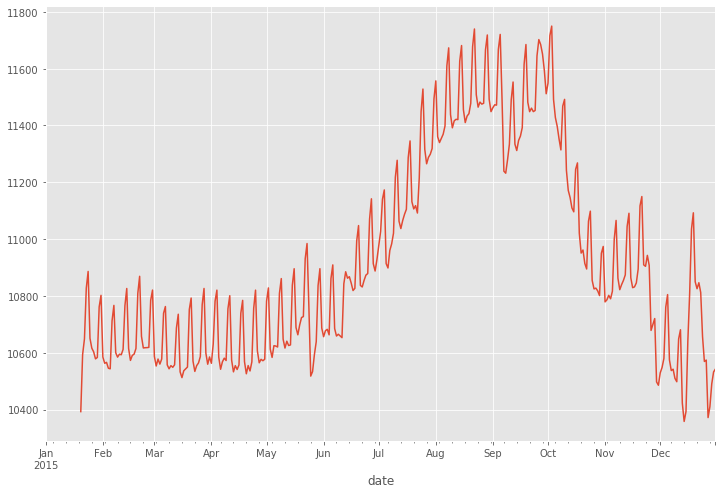

In [15]:
f_birth_mean.plot()

In [16]:
value = pd.DataFrame(series_value) #convering series to dataframe 

In [17]:

value.head()

,0
0,8068
1,10850
2,8328
3,7065
4,11892


In [18]:
#base model previous value is best reflection of next value (naive)
birth_df = pd.concat([value,value.shift(1)], axis=1)

In [19]:
birth_df.head()

,0,0
0,8068,NaN
1,10850,8068.0
2,8328,10850.0
3,7065,8328.0
4,11892,7065.0


In [20]:
birth_df.columns = ['actual_birth','forecast_birth']

In [21]:
birth_df.head()

,actual_birth,forecast_birth
0,8068,NaN
1,10850,8068.0
2,8328,10850.0
3,7065,8328.0
4,11892,7065.0


In [22]:
#error test (train or entire data)
from sklearn.metrics import mean_squared_error 
import numpy as np

In [23]:
#remove the NaN from DF
birth_test = birth_df[1:]
birth_test

,actual_birth,forecast_birth
1,10850,8068.0
2,8328,10850.0
3,7065,8328.0
4,11892,7065.0
5,12425,11892.0
...,...,...
360,7518,7294.0
361,13100,7518.0
362,13458,13100.0
363,13100,13458.0


In [24]:
birth_error = mean_squared_error(birth_test.actual_birth,birth_test.forecast_birth)
birth_error

5162403.576923077

In [25]:
np.sqrt(birth_error) #std -->2076.683881

2272.092334594498

In [26]:
# ARIMA autoregressive(p)integrated(d) moving avarage(q)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

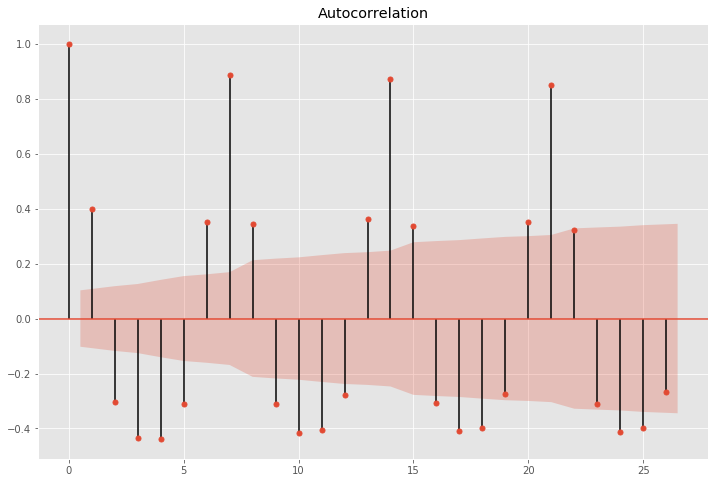

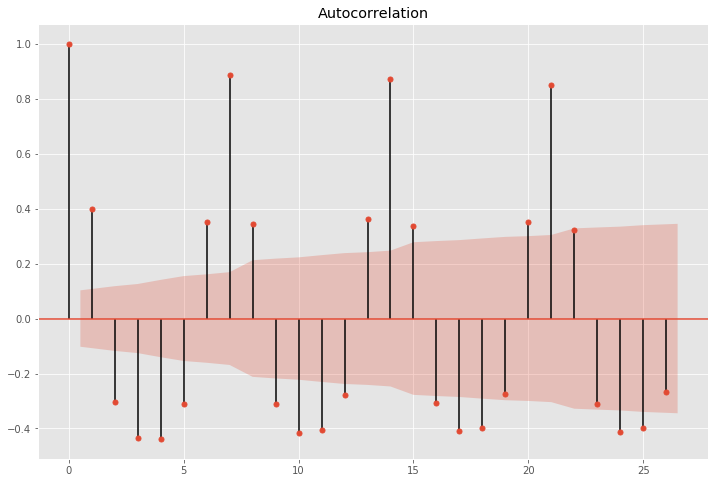

In [27]:
#plot_acf is to identfy parameter (q)
#arima(p,d,q)
plot_acf(f_birth)


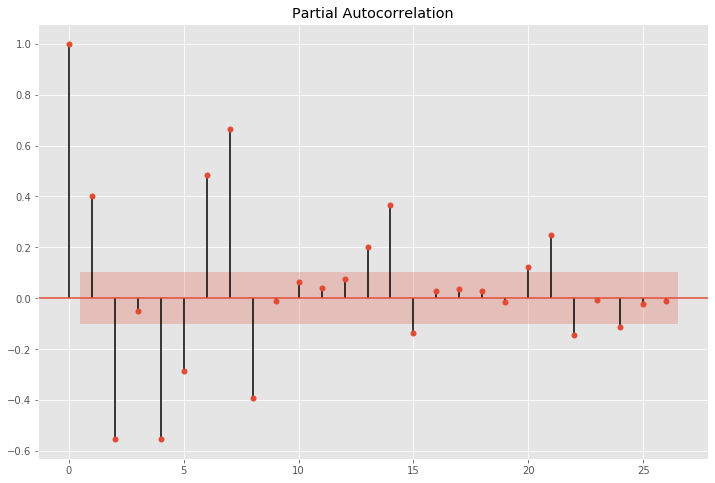

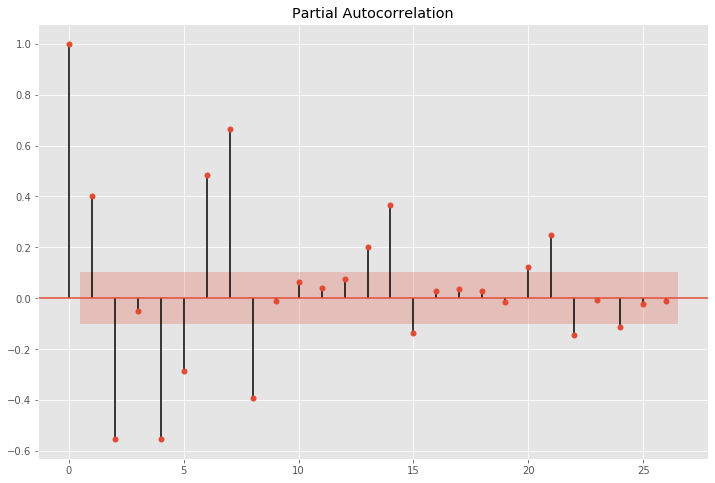

In [28]:
plot_pacf(f_birth) #to identify the value of p

In [29]:
# p= 2,3 d=0 q=3,4
f_birth.size

365

In [35]:
birth_train = f_birth[0:330]
birth_test =f_birth[330:365]

In [36]:
from statsmodels.tsa.arima_model import ARIMA

In [68]:
birth_model = ARIMA(birth_train, order=(5,1,5))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [75]:
birth_model_fit = birth_model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [76]:
birth_model_fit.aic

5223.176850476786

In [77]:
birth_forecast = birth_model_fit.forecast(steps= 35)[0]

In [78]:
birth_forecast

array([11986.89171608,  8063.53931581,  7866.38265193, 11409.31367369,
       12817.55392694, 11490.08957299, 11630.07994914, 11214.80406252,
        8218.03893818,  7855.87782742, 11424.72988888, 12823.91785512,
       11495.83262663, 11634.15040452, 11221.53143469,  8231.28341344,
        7870.97953244, 11435.48915231, 12831.12102568, 11501.4289988 ,
       11638.26234154, 11228.263594  ,  8244.52520797,  7886.06888253,
       11446.23798405, 12838.32073094, 11507.03153393, 11642.38801005,
       11235.00553616,  8257.76340005,  7901.14606028, 11456.9763848 ,
       12845.51700042, 11512.64022952, 11646.52738175])

In [79]:
birth_test

date
2015-11-27     8942
2015-11-28     7734
2015-11-29     7230
2015-11-30    12214
2015-12-01    13185
2015-12-02    12708
2015-12-03    12281
2015-12-04    11828
2015-12-05     8262
2015-12-06     7194
2015-12-07    11567
2015-12-08    12328
2015-12-09    11857
2015-12-10    12259
2015-12-11    11406
2015-12-12     8073
2015-12-13     7262
2015-12-14    11753
2015-12-15    12437
2015-12-16    12282
2015-12-17    12339
2015-12-18    12247
2015-12-19     8368
2015-12-20     7361
2015-12-21    12692
2015-12-22    13131
2015-12-23    11595
2015-12-24     8714
2015-12-25     6515
2015-12-26     7294
2015-12-27     7518
2015-12-28    13100
2015-12-29    13458
2015-12-30    13100
2015-12-31    11608
Name: births, dtype: int64

In [80]:
np.sqrt(mean_squared_error(birth_test,birth_forecast))

1269.009357043136